In [1]:
### import important library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
### read .Csv file 
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
## cheak null value in dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
## spliting data set into x,y 
x=df.drop('target',axis=1)
y=df['target']



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [8]:
## split the dataset into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=None)


In [12]:
## cheak the error rate after that we select N_neighbours
from sklearn.neighbors import KNeighborsClassifier
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    error_rate.append(1-pred.mean())
error_rate
    

[0.42622950819672134,
 0.639344262295082,
 0.4590163934426229,
 0.5573770491803278,
 0.3770491803278688,
 0.4918032786885246,
 0.42622950819672134,
 0.4918032786885246,
 0.4098360655737705,
 0.5245901639344263,
 0.360655737704918,
 0.4918032786885246,
 0.42622950819672134,
 0.540983606557377,
 0.4098360655737705,
 0.5245901639344263,
 0.4426229508196722,
 0.5081967213114754,
 0.4098360655737705,
 0.47540983606557374,
 0.4590163934426229,
 0.47540983606557374,
 0.42622950819672134,
 0.4590163934426229,
 0.4098360655737705,
 0.4590163934426229,
 0.4098360655737705,
 0.42622950819672134,
 0.360655737704918,
 0.39344262295081966,
 0.3770491803278688,
 0.4098360655737705,
 0.360655737704918,
 0.4098360655737705,
 0.3770491803278688,
 0.39344262295081966,
 0.3278688524590164,
 0.39344262295081966,
 0.34426229508196726]

In [27]:
## RandomForest Algorithm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)
print(accuracy_score(y_test,y_pred))
y_pred


0.7704918032786885


array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0])

Text(0, 0.5, 'error rate')

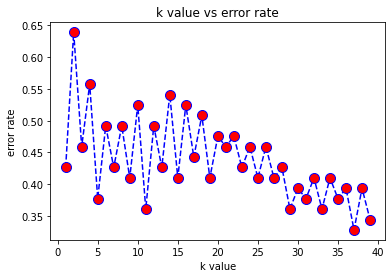

In [13]:
### now plot the graph between error_rate and K value
plt.plot(range(1,40),error_rate,color='b',marker='o',linestyle='--',mfc='r',ms=10)
plt.title('k value vs error rate')
plt.xlabel('k value')
plt.ylabel('error rate')



In [17]:
#confusion matrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(confusion_matrix(y_test,pred))


[[15 12]
 [ 6 28]]
accuracy os model is :0.7049180327868853


In [15]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.56      0.63        27
           1       0.70      0.82      0.76        34

    accuracy                           0.70        61
   macro avg       0.71      0.69      0.69        61
weighted avg       0.71      0.70      0.70        61



In [32]:
#model is ready to prediction
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='liblinear')
model.fit(x,df['target'])
pred_i=model.predict(x_test)
pred_i



0.8852459016393442


In [33]:
## accuracy=88.52%
print(accuracy_score(y_test,pred_i))

0.8852459016393442


In [42]:
ip=[]
for i in range(13):
  if i==0:
    print("Enter the Age")
    a=int(input())
    ip.append(a)
  elif i==1:
    print("Enter the Sex:")
    print('0:male',end='\n')
    print('1:female',end='\n')
    a=int(input())
    ip.append(a)
  elif i==2:
    print('Enter cp value')
    a=int(input())
    ip.append(a)
  elif i==3:
    print('Enter treastbps value')
    a=int(input())
    ip.append(a)
  elif i==4:
    print('Enter chol value')
    a=int(input())
    ip.append(a)
  elif i==5:
    print('Enter fbs value')
    a=int(input())
    ip.append(a)
  elif i==6:
    print('Enter restecg value')
    a=int(input())
    ip.append(a)
  elif i==7:
    print('Enter thalch value')
    a=int(input())
    ip.append(a)
  elif i==8:
    print('Enter exang value')
    a=int(input())
    ip.append(a)
  elif i==9:
    print('Enter oldpeak value')
    a=float(input())
    ip.append(a)
  elif i==10:
    print('Enter slope value')
    a=int(input())
    ip.append(a)
  elif i==11:
    print('Enter ca value')
    a=int(input())
    ip.append(a)
  elif i==12:
    print('Enter thal value')
    a=int(input())
    ip.append(a)
dat=np.asarray(ip)
m=dat.reshape(1,-1)
pre=model.predict(m)
if pre[0]==0:
    print('person do not have heart disease')
else:
    print('person have heart disease')

Enter the Age
63
Enter the Sex:
0:male
1:female
1
Enter cp value
3
Enter treastbps value
145
Enter chol value
233
Enter fbs value
1
Enter restecg value
0
Enter thalch value
150
Enter exang value
0
Enter oldpeak value
2.3
Enter slope value
0
Enter ca value
0
Enter thal value
1
person have heart disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
01211111